# Bikesharing
(From Dataquest)

In many countries, there are bikesharing programs where anyone can rent a bike from a depot, and return it at other depots throughout a city. There is one such program in Washington, D.C., in the US. We'll be looking at the number of bikes that were rented by day. Here are the relevant columns:

* dteday -- the date that we're looking at.
* casual -- the number of casual riders (people who hadn't previously signed up with the bikesharing program) that rented bikes on the day.
* registered -- the number of registered riders (people who signed up previously) that rented bikes.
* cnt -- the total number of bikes rented.

This data were collected by Hadi Fanaee-T at the University of Porto, and can be downloaded http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset.

In [9]:
import pandas
bikes = pandas.read_csv("data/bike_rental_day.csv")
bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


Let's explore our data a bit, first by finding the probability that more than 2000 bikes will be rented on any given day.

In [10]:
# Find the number of days the bikes rented exceeded the threshold.
days_over_threshold = bikes[bikes["cnt"] > 2000].shape[0]
# Find the total number of days we have data for.
total_days = bikes.shape[0]

In [11]:
# Get the probability that more than 2000 bikes were rented for any given day.
probability_over_2000 = days_over_threshold / total_days
print(probability_over_2000)

0.86593707250342


Let's calculate the probability that more than 4000 bikes will be rented on any given day.

In [19]:
days_over_threshold = bikes[bikes["cnt"] > 4000].shape[0]
probability_over_4000 = days_over_threshold / total_days

In [20]:
print(probability_over_4000)

0.6183310533515732


We can calculate the number of combinations in which an outcome can occur k times in a set of events with a formula:

`N! / (k!*(N-k!))`

In this formula, N is the total number of events we have, and k is the target number of times we want our desired outcome to occur. So if we wanted to find the number of combinations in which 4 out of 5 days can be sunny, we'd set to 5, and to 4. 

We can calculate probabilities greater than or equal to a threshold with our bike sharing data. We found that the probability of having more riders than 4000 is about .6. We can use this to find the probability that in 10 days, 7 or more days have more than 4000 riders.

But first, let's find the number of combinations in which 7 days out of 10 have more than 4000 rentals.

In [13]:
import math
def find_outcome_combinations(N, k):
    # Calculate the numerator of our formula.
    numerator = math.factorial(N)
    # Calculate the denominator.
    denominator = math.factorial(k) * math.factorial(N - k)
    # Divide them to get the final value.
    return numerator / denominator



combinations_7 = find_outcome_combinations(10, 7)

Let's define p as the probability of an outcome occurring, and q as the probability of it not occurring. These types of probabilites are known as binomial -- there are two values, which add to 1 collectively. There's a 100% chance of one outcome or the other occurring.

Many commonly occurring events can be expressed in terms of binomial outcomes -- a coin flip, winning a football game, the stock market going up, and more.

When we deal with binomial probabilities, we're often interested in the chance of a certain outcome happening in a sequence. We want to know what the chances are of our favorite football team winning 5 of its next 6 games, and the stock market going up in 4 of the next 6 days.

The same interest applies when we're analyzing data. Companies and researchers conduct experiments every day. These can range from testing whether changing the button color on your webpage increases conversion rate to seeing if a new drug increases patient recovery rate.

The core of these tests is the idea of a binomial distribution -- we want to know how many visitors out of 100 would normally sign up for our website, and we want to know if changing our button color affected that probability.

One easy way to visualize binomials is a binomial distribution. Given N events, it plots the probabilities of getting different numbers of successful outcomes.

The probability for each combination in which k of the same outcome can happen in N events is always the same. Given this, we can calculate the probability of a given outcome happening k times in N events by multiplying the number of combinations in which our result can occur by the probability of a single combination occurring.

The probability of a single combination occurring is given by 

`p**k * q**(N-k)`
.
Let's calculate the probability of:
* 8 days out of 10 having more than 4000 riders assigning the result to prob_8.
* 9 days out of 10 having more than 4000 riders.
* 10 days out of 10 having more than 4000 riders.


The probability of having more than 4000 riders on any single day is about .6. This means that p is .6, and q is .4.

In [17]:
def proba(N, k, p):
    nbCombi = find_outcome_combinations(N, k)
    q = 1 - p
    return nbCombi * p**k * q**(N-k)

prob_8 = proba(10, 8, 0.6)
prob_9 = proba(10, 9, 0.6)
prob_10 = proba(10, 10, 0.6)
print('prob 8:', prob_8)
print('prob 9:', prob_9)
print('prob 10:', prob_10)

prob 8: 0.12093235199999998
prob 9: 0.04031078399999999
prob 10: 0.006046617599999997


In our case, there is 12% chance that the weather would be sunny 8 days out of 10 by random chance. There is 4% chance for 9 days out of 10, and .6% for 10 days out of 10 to get a 16.6% total chance. We can add all probabilities to get the chance of the sunny outcome happening 8 or more time in our 10 days. 

This is a statistically significant result, but it would require more investigation, including collecting results for more days, to get a more conclusive result.

Let's find out how many days out of the next 30 we can expect more than 5000 riders.

Rather than give an exact number, which may not be accurate, we can hedge our bets with a probability distribution in order to show all the possibilities, along with probabilities for each.

First, we have to find the probability of there being more than 5000 riders in a single day.

In [21]:
# Find the number of days the bikes rented exceeded the threshold.
days_over_threshold = bikes[bikes["cnt"] > 5000].shape[0]
# Find the total number of days we have data for.
total_days = bikes.shape[0]
# Get the probability that more than 5000 bikes were rented for any given day.
prob_over_5000 = days_over_threshold / total_days
print(probability_over_5000)

0.3912448700410397


We now know that the probability is about .39 that there are more than 5000 riders in a single day.

Let's find out the probability of 0 days out of 30 with more than 5000 riders, the probability of 1 day out of 30, and so on, up to 30 days out of 30:

In [22]:
# Each item in this list represents one k, starting from 0 and going up to and including 30.
outcome_counts = list(range(31))
outcome_probs = []
for k in outcome_counts:
    outcome_probs.append(proba(30, k, 0.39))

Our data is in terms of whole days. Either 1 day has more than 5000 riders, or 2 days have more than 5000 riders. It doesn't make sense to talk about the probability of 1.5 days having more than 5000 riders. The points in our data are discrete and not continuous, so we use a bar chart when plotting.

Now that we've computed the distribution, we can easily plot it out using matplotlib. This will show us a nice distribution of our probabilities, along with the most likely outcomes.

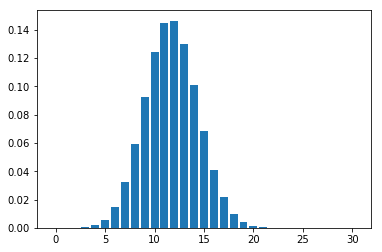

In [23]:
import matplotlib.pyplot as plt

# The most likely number of days is between 10 and 15.
plt.bar(outcome_counts, outcome_probs)
plt.show()

To construct our distribution, we had to write our own custom function, and a decent amount of code. We can instead use the binom.pmf function from SciPy to do this faster.

Here's a usage example:


In [24]:
from scipy import linspace
from scipy.stats import binom

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)

# Create the binomial probabilities, one for each entry in outcome_counts.
dist = binom.pmf(outcome_counts,30,0.39)

The pmf function in SciPy is an implementation of the mathematical probability mass function. The pmf will give us the probability of each k in our outcome_counts list occurring.

A binomial distribution only needs two parameters. A parameter is the statistical term for a number that summarizes data for the entire population. For a binomial distribution, the parameters are:

    N, the total number of events,
    p, the probability of the outcome we're interested in seeing.

The SciPy function pmf matches this and takes in the following parameters:

    x: the list of outcomes,
    n: the total number of events,
    p: the probability of the outcome we're interested in seeing.

We only need two parameters to describe a distribution, it doesn't matter whether we want to know if it will be sunny 5 days out of 5, or if 5 out of 5 coin flips will turn up heads. As long as the outcome that we care about has the same probability (p), and N is the same, the binomial distribution will look the same.

We can use the binom.pmf function from SciPy to do this faster.

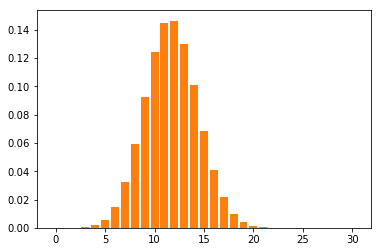

In [2]:
from scipy import linspace
from scipy.stats import binom
import matplotlib.pyplot as plt

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
# Create the binomial probabilities, one for each entry in outcome_counts.
dist = binom.pmf(outcome_counts,30,0.39)

plt.bar(outcome_counts, dist)
plt.show()

The expected value of a probability distribution: the most likely result of a single sample that we look at is N*p.

Let's compute the mean for the bikesharing data, where N=30, and p=0.39:

In [ ]:
dist_mean = 30*0.39

Let's compute the standard deviation of a probability distribution: math.sqrt(N*p*q)
where N=30 and p=0.39

In [ ]:
import math
dist_stdev = math.sqrt(30*0.39*(1-0.39))